# Project: Investigate TMDB Movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset is a collection of data about 10,000 movies having data like popularity, budget, revenue, genre and others.

This dataset will be used to perform some analysis on it to help determine the factors that make a good movie and affect the popularity and revenue of the movie


### Question(s) for Analysis
- What is the relation between release year and the popularity of the movie ?
- What is the relation between the release year and movie revenue ?
- Does the votes of a movie affect the popularity and what is the correlation between them ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# prevent pandas from displaying scientific notation for big numbers
pd.options.display.float_format = '{:.3f}'.format

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Read the csv file into a dataframe
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


In [7]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
 

#### Drop unwanted columns

In [8]:
# drop all unwanted columns that will negatively affect the analysis
df.drop(columns=['homepage', 'tagline', 'keywords', 'production_companies', 'imdb_id', 'overview'], inplace=True)

In [9]:
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [10]:
df.shape

(10866, 15)

In [11]:
#  remove all rows with missing data
df.dropna(inplace=True)

In [12]:
df.shape

(10732, 15)

In [13]:
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10732 non-null  int64  
 1   popularity      10732 non-null  float64
 2   budget          10732 non-null  int64  
 3   revenue         10732 non-null  int64  
 4   original_title  10732 non-null  object 
 5   cast            10732 non-null  object 
 6   director        10732 non-null  object 
 7   runtime         10732 non-null  int64  
 8   genres          10732 non-null  object 
 9   release_date    10732 non-null  object 
 10  vote_count      10732 non-null  int64  
 11  vote_average    10732 non-null  float64
 12  release_year    10732 non-null  int64  
 13  budget_adj      10732 non-null  float64
 14  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [15]:
# remove duplicated rows from the dataset
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(10731, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
 13  budget_adj      10731 non-null  float64
 14  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [18]:
# display the actual datatypes of the columns
for col in df.columns:
    print('{}   ->   {}'.format(col + ' '*(14 - len(col)), type(df[col][2])))

id               ->   <class 'numpy.int64'>
popularity       ->   <class 'numpy.float64'>
budget           ->   <class 'numpy.int64'>
revenue          ->   <class 'numpy.int64'>
original_title   ->   <class 'str'>
cast             ->   <class 'str'>
director         ->   <class 'str'>
runtime          ->   <class 'numpy.int64'>
genres           ->   <class 'str'>
release_date     ->   <class 'str'>
vote_count       ->   <class 'numpy.int64'>
vote_average     ->   <class 'numpy.float64'>
release_year     ->   <class 'numpy.int64'>
budget_adj       ->   <class 'numpy.float64'>
revenue_adj      ->   <class 'numpy.float64'>


In [19]:
df.duplicated().sum()

0

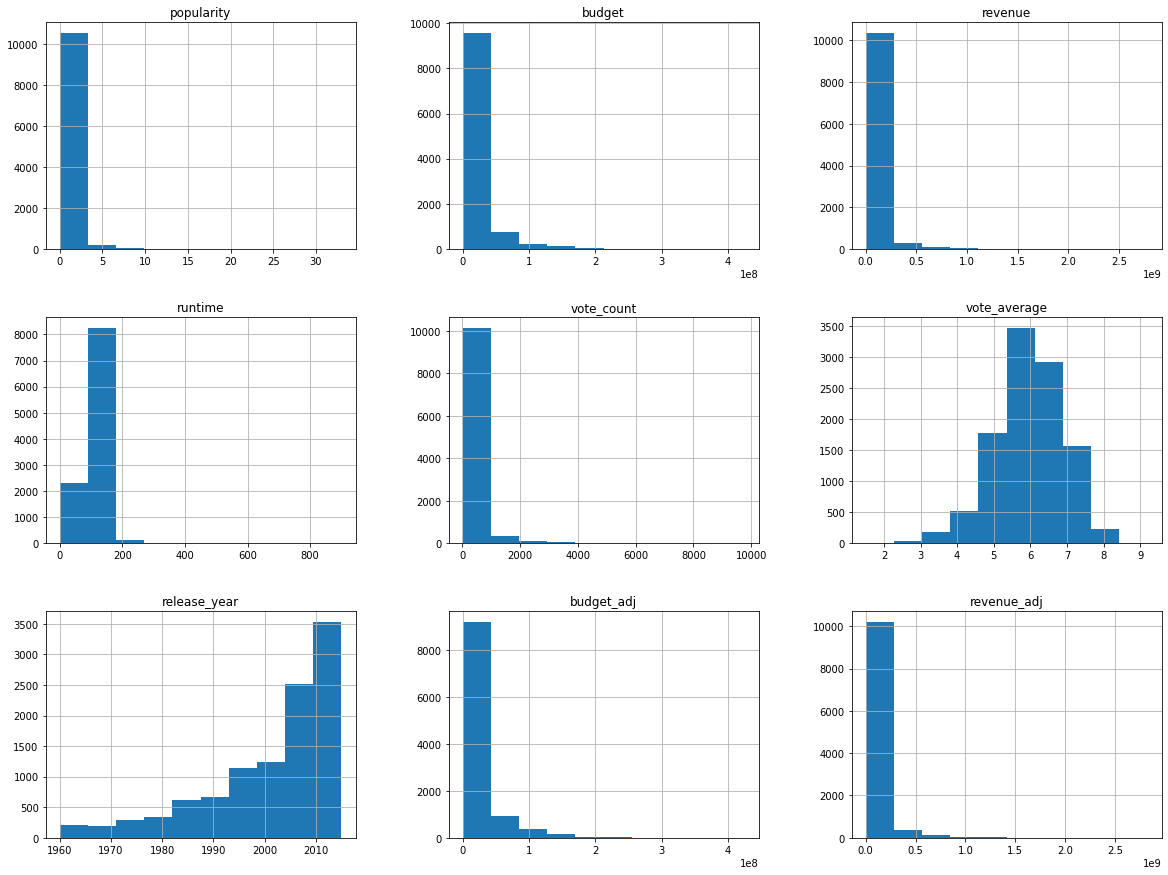

In [20]:
df.hist(figsize=(20, 15), column=['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']);

From the histograms above we can see that
1- more movies are being released every year
2- low budget movies are more than high budget movies
3- most average votes are around 5 and 6
4- most movies runtimes are from 100 and 200

## Data Wrangling Summary
- find the unwanted columns that might negatively affect the analysis
- remove the unwanted columns
- find rows with missing data
- take the right decision related to the rows with missing data
- find the rows with duplicated data
- removed the rows with duplicated data

## Plotting function

In [21]:
'''
plot the data from the dataframe in a scatter plot using the parameters as inputs to the plot function
x_col = x axis data label in the dataframe
y_col = y axis data label in the dataframe
x_label = the label that will be shown for the x axis
y_label = the label that will be shown for the y axis
title = the title given to the plot figure
'''
def plot_scatter(x_col, y_col, x_label, y_label, title):
    plot = df[[x_col, y_col]].plot(kind="scatter", x=x_col, y=y_col, figsize=(25, 14), legend=True);
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    plot.set_title(title)
    plot.legend([y_label])


<a id='eda'></a>
## Exploratory Data Analysis


## Question 1: 
### What is the relation between release year and the popularity of the movie ?

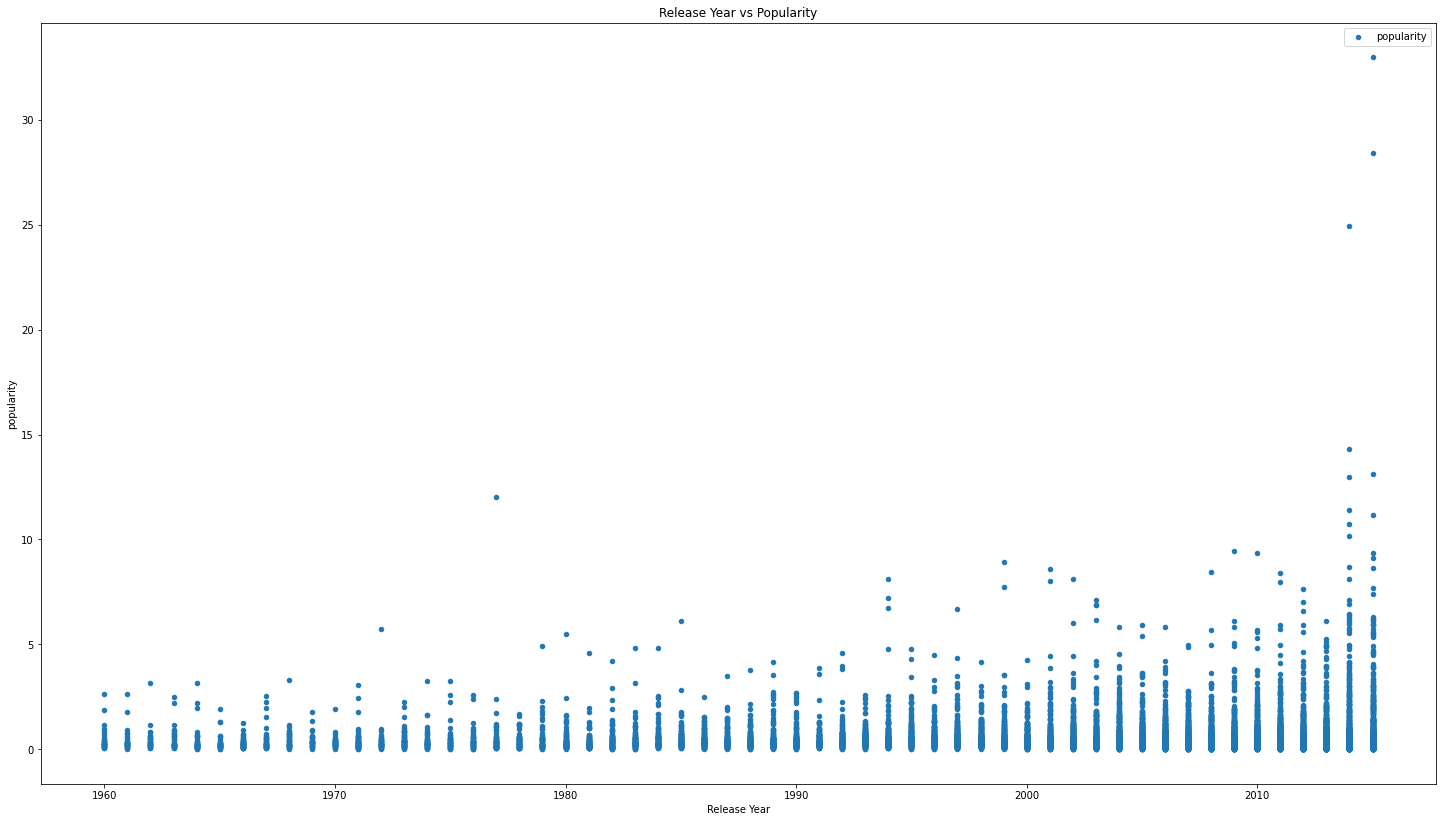

In [22]:
plot_scatter('release_year', 'popularity', 'Release Year', 'popularity', 'Release Year vs Popularity')

From the plot above it is apparent that the popularity is greater with newer movies with positive correlation

## Question 2:
### What is the relation between the release year and movie revenue ?

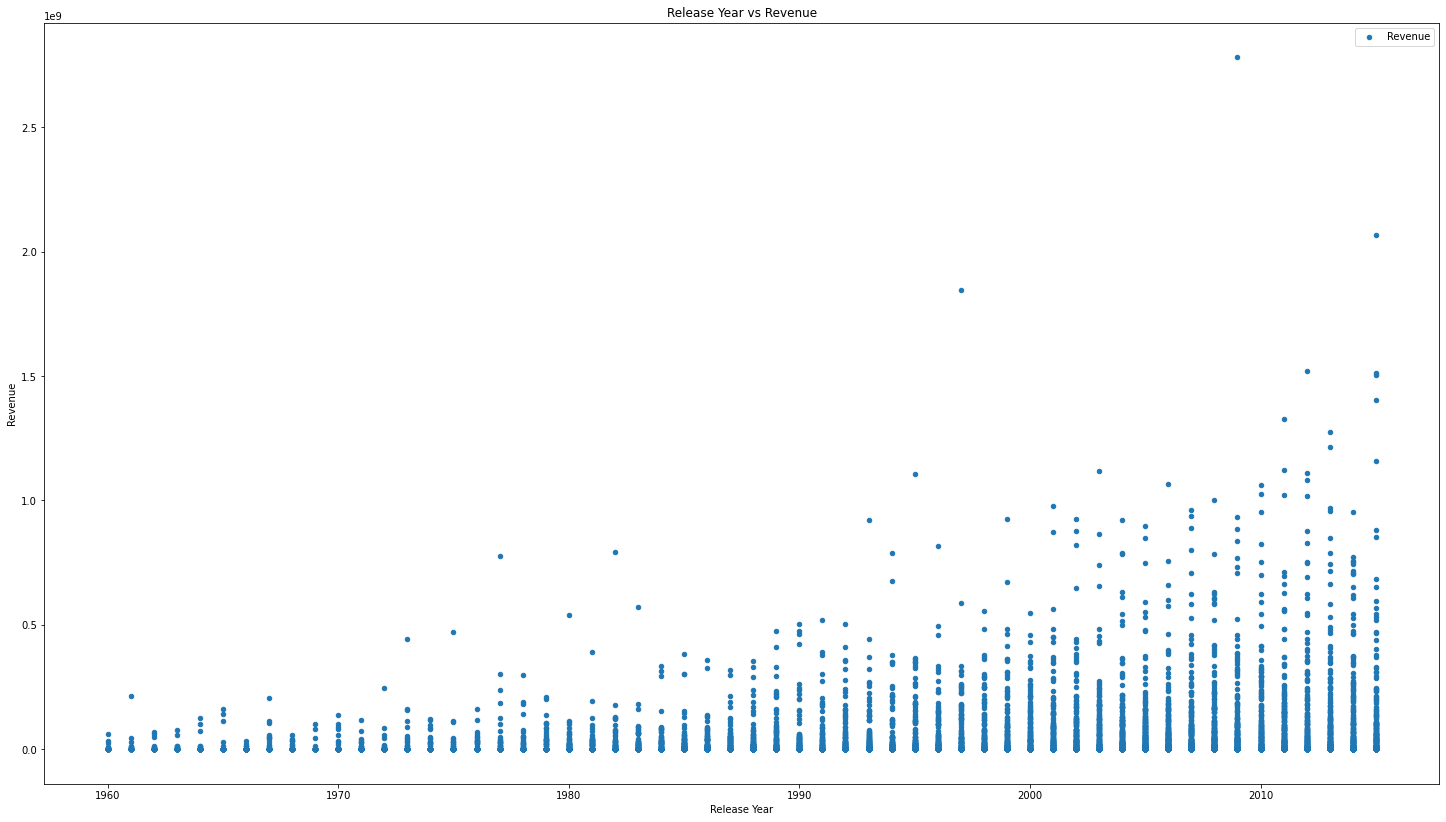

In [23]:
plot_scatter('release_year', 'revenue', 'Release Year', 'Revenue', 'Release Year vs Revenue')

We can see from the plot above that newer movies have higher revenues

## Question 3:
### Does the votes of a movie affect the popularity and what is the correlation between them ?

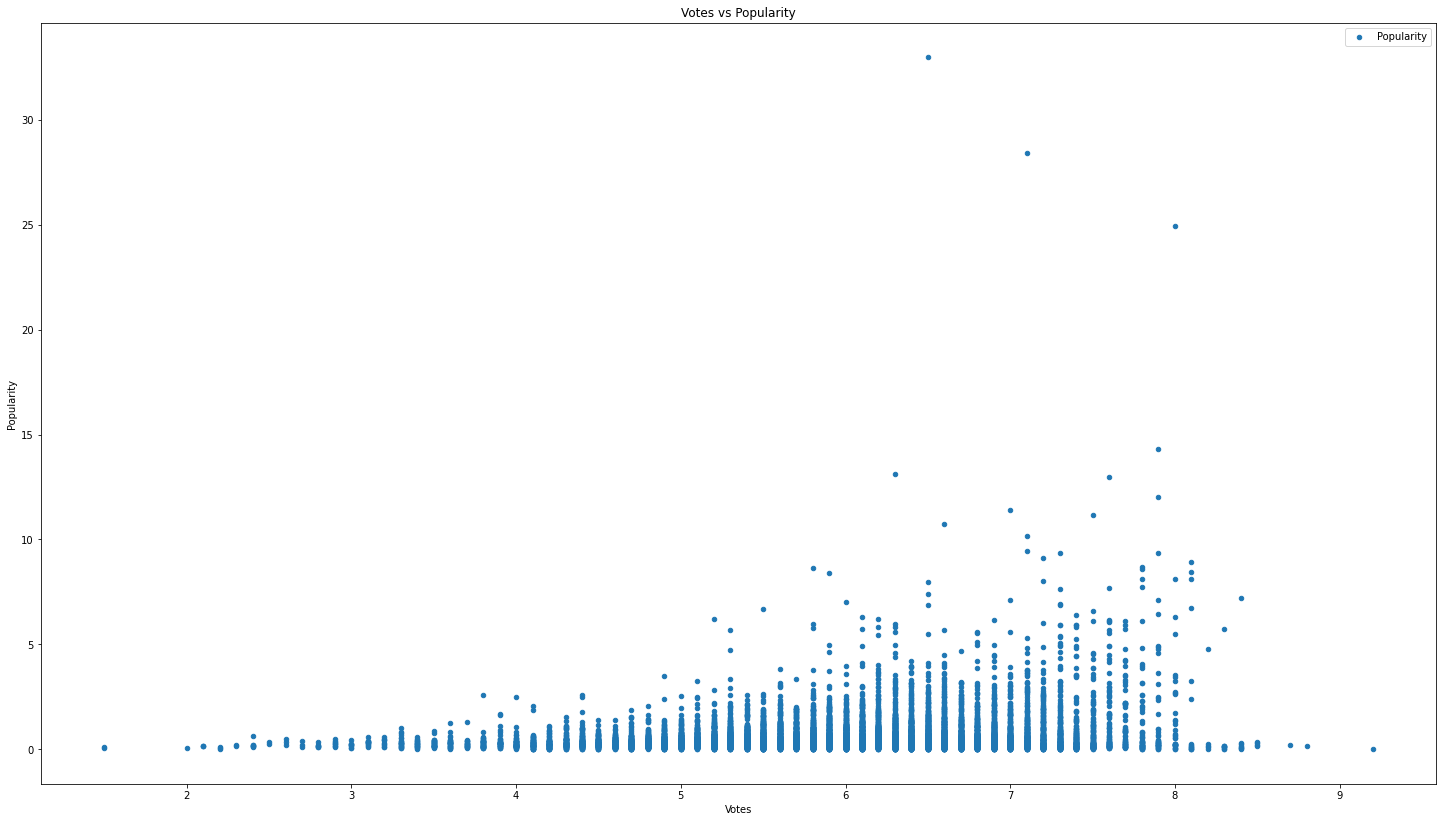

In [24]:
plot_scatter('vote_average', 'popularity', 'Votes', 'Popularity', 'Votes vs Popularity')

We can see from the above plot that the higher the votes of the movie the more popular it is

<a id='conclusions'></a>
## Conclusions

from the data above we can conclude that along the years movies gained more popularity and more votes from users and also movies get more and more revenue and that can be due to 
the increase in the movies qualities and the amazing graphics in the movies and also due to more and more people like watching movies from all genres.

The data provided in the dataset were more than sufficient to answer my questions

Since the data samples are 10000 so even after removing the missing data which were not much i still had enough data to make good judgements and this dataset can also be used to do predictions if used in a prediction system using AI

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb', '&&', ])
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb', '--to', 'html', '--output', 'Investigate_a_Dataset.html', '--ouput-dir', './', '--debug'])

2